<a href="https://colab.research.google.com/github/Scottman625/Tibame-DeepLearning/blob/main/res.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
model = ResNet50V2(include_top=False, input_shape=(224, 224, 3))
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

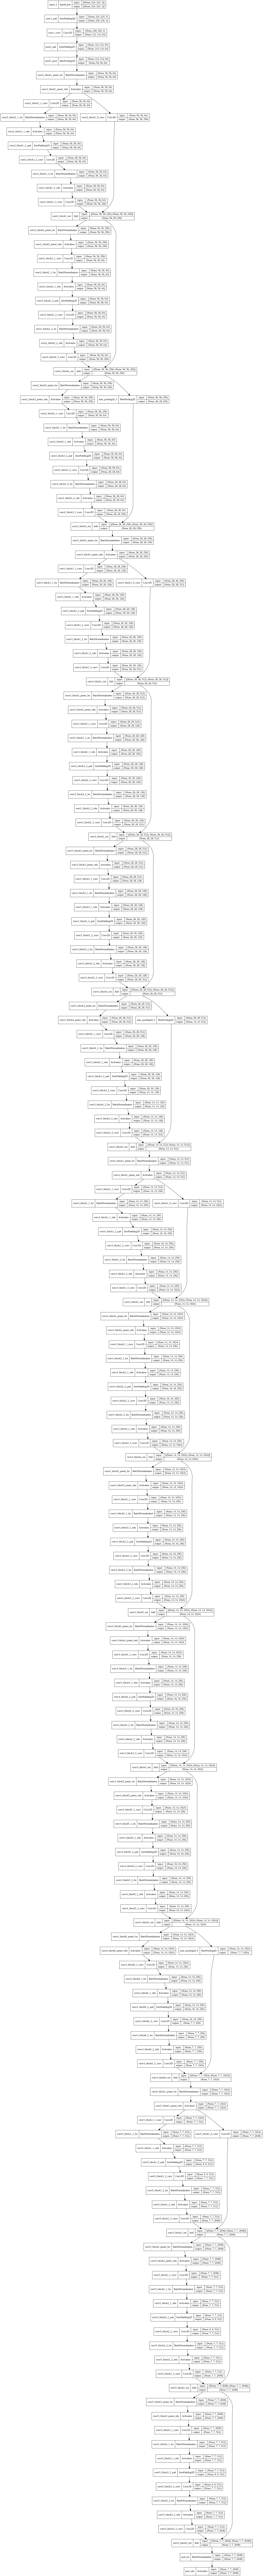

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file="res.png")

In [ ]:
# 第一種res block(提升深度)
# 短路線: 1024個 1x1conv
w = model.get_layer("conv4_block1_0_conv").get_weights()[0]
print(w.shape)
# 殘差線: 256個 1x1conv(減少計算量) -> 256個3x3conv -> 1024個1x1conv
w = model.get_layer("conv4_block1_1_conv").get_weights()[0]
print(w.shape)
w = model.get_layer("conv4_block1_2_conv").get_weights()[0]
print(w.shape)
w = model.get_layer("conv4_block1_3_conv").get_weights()[0]
print(w.shape)

(1, 1, 512, 1024)
(1, 1, 512, 256)
(3, 3, 256, 256)
(1, 1, 256, 1024)


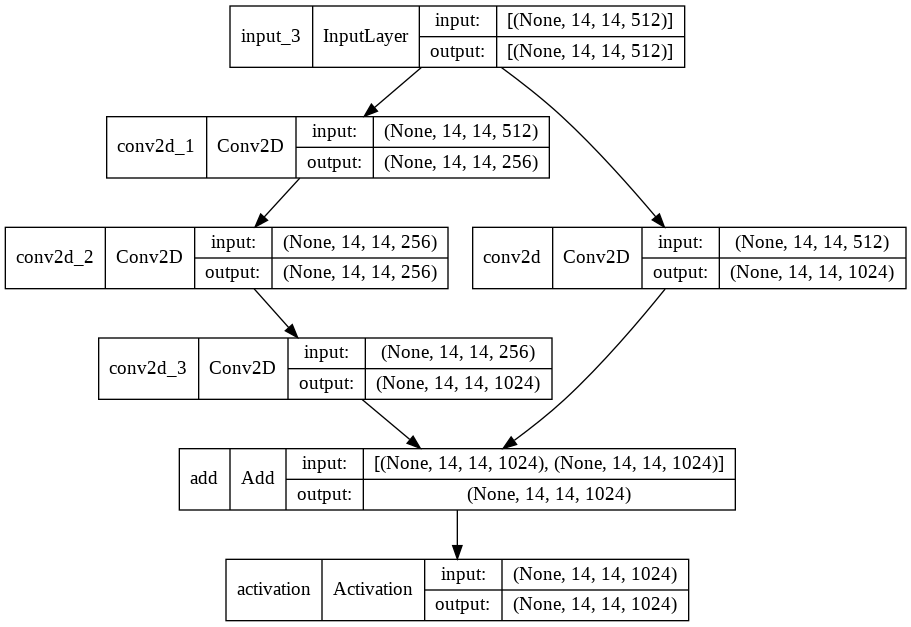

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Activation, Input, Add
i = Input(shape=(14, 14, 512))
# 短路
x1 = Conv2D(1024, 1, padding="same")(i)
# 殘差
x2 = Conv2D(256, 1, activation="relu", padding="same")(i)
x2 = Conv2D(256, 3, activation="relu", padding="same")(x2)
# activation後做, 因為殘差有可能負值
x2 = Conv2D(1024, 1, padding="same")(x2)
o = Add()([x1, x2])
o = Activation("relu")(o)
model = Model(inputs=i, outputs=o)
plot_model(model, show_shapes=True, to_file="res.png")

In [ ]:
#第二種resbock(維持深度)
# 短路線: 自己
# 殘差線: 256個 1x1conv(減少計算量) -> 256個3x3conv -> 1024個1x1conv
w = model.get_layer("conv4_block2_1_conv").get_weights()[0]
print(w.shape)
w = model.get_layer("conv4_block2_2_conv").get_weights()[0]
print(w.shape)
w = model.get_layer("conv4_block2_3_conv").get_weights()[0]
print(w.shape)

ValueError: ignored